# TITLE:- TESLA STOCK PRICE PREDICTION USING DEEP LEARNING (SimpleRNN & LSTM)

# Project Objective:-
The objective of this project is to predict the future closing price of Tesla stock using historical stock price data.
Since stock prices follow a time-dependent pattern, time-series deep learning models such as SimpleRNN and LSTM are used to learn trends from sequential data.
The models are trained to predict 1-day, 5-day, and 10-day future stock price movements.
The performance of both models is evaluated and compared using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to measure prediction accuracy.

# STEP 1:- DATA ANALYSIS

In [1]:
# Import the Required Libraries
import pandas as pd
import numpy as np

# Load the Tesla stock dataset
df = pd.read_csv("../data/TSLA.csv")

# Display first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [2]:
# Check number of rows and columns
df.shape

(2416, 7)

In [3]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
# Convert Date column from String to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Check date range
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

Start Date: 2010-06-29 00:00:00
End Date: 2020-02-03 00:00:00


In [5]:
# Check missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# STEP 2:- EXPLORATORY DATA ANALYSIS (EDA)
The purpose of Exploratory Data Analysis (EDA) is to understand the structure, patterns, and behavior of the data before building models.
It helps identify trends, relationships, missing values, outliers, and data quality issues so that appropriate preprocessing and modeling techniques can be applied.

# 1. Closing Price Trend Over Time
This plot visualizes the historical trend of Tesla’s closing stock price over time.
It helps in understanding the overall price movement, long-term trends, and periods of volatility in the stock.

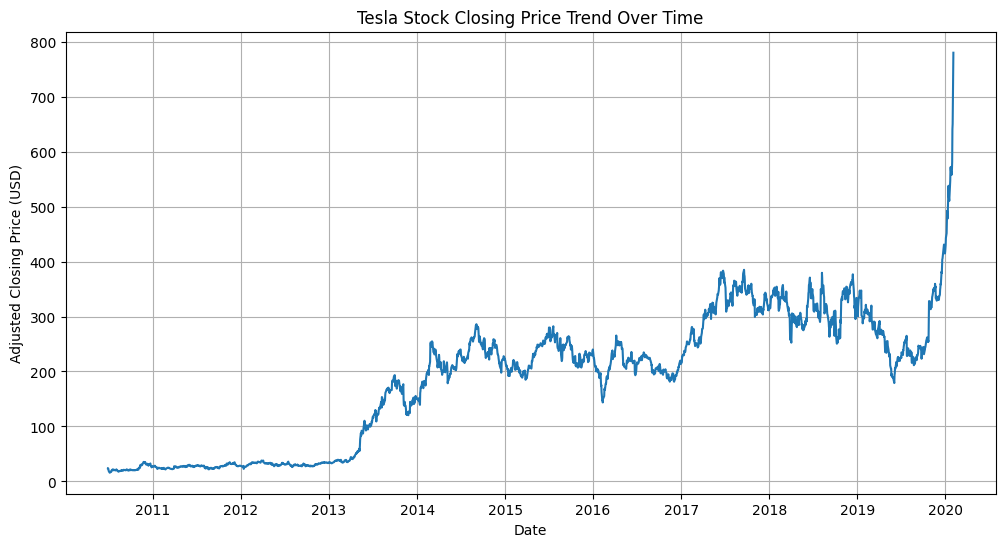

In [6]:
# This step imports the required library
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # This step creates the dimensions for the plot
plt.plot(df.index, df['Adj Close']) # This selects the variables for X-Axis (index = date) and Y-Axis (Adj Close)
plt.title("Tesla Stock Closing Price Trend Over Time") # This step creates the title for the plot
plt.xlabel("Date") # This creates the title for the X-Axis
plt.ylabel("Adjusted Closing Price (USD)") # This creates the title for the Y-Axis
plt.grid(True) # This step creates the grid structure for the plot
plt.show()

# Outcome:-
Tesla’s stock price shows a strong overall upward trend over the years.

There are periods of high volatility, with noticeable ups and downs in the mid-years.

Toward the end, the stock experiences a sharp price surge, indicating rapid growth and strong market momentum.

# 2. Volume vs Closing Price
This plot shows the relationship between trading volume and Tesla’s closing stock price.
It helps in understanding how trading activity (number of shares traded) varies with price movements and highlights periods of high investor interest or strong market reactions.

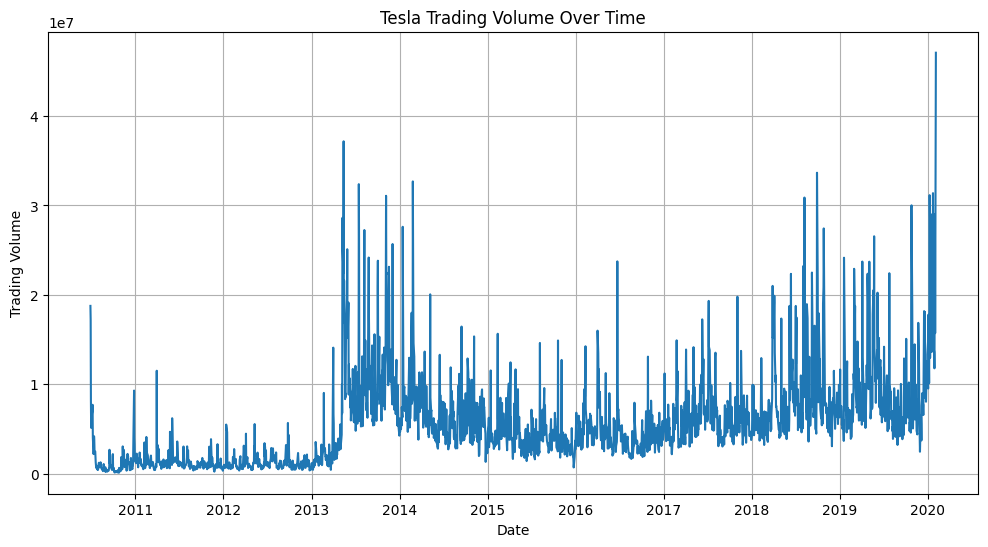

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.grid(True)
plt.show()

# Outcome:-
Tesla’s trading volume is low and stable in the early years, indicating limited market activity.

There are frequent spikes in volume, usually corresponding to major price movements or news events.

Toward the later years, volume increases significantly, showing growing investor interest and higher market participation.

# 3. Moving Averages (Trend Smoothing)
This plot shows moving averages of Tesla’s stock price over time.
It helps in smoothing short-term fluctuations, making it easier to identify the overall trend, trend changes, and potential support or resistance levels in the stock price.

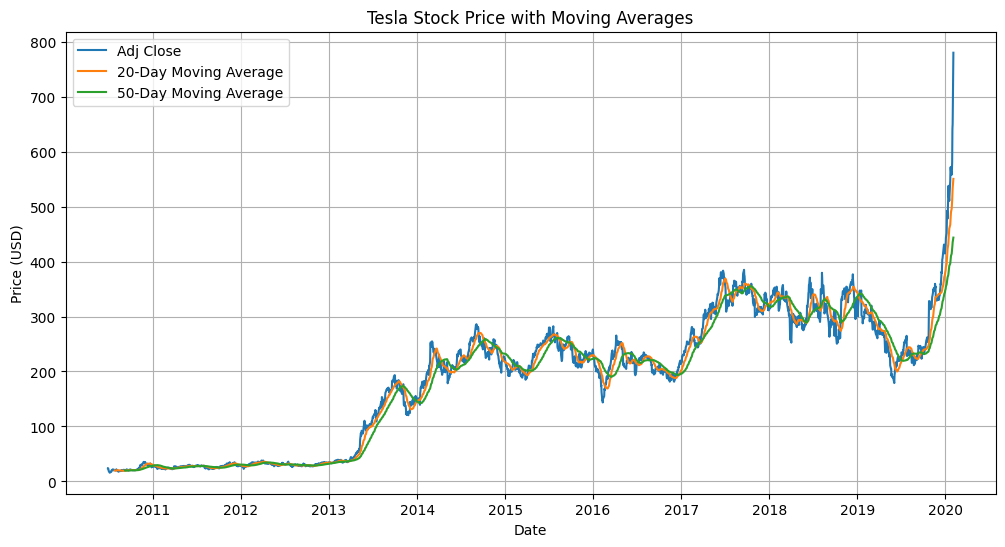

In [8]:
# This step creates two new columns (MA_20 and MA_50)
# The columns roll back for each day to fetch the price of the previous 20 and 50 days
# And stores the mean value for the previous prices for past 20 and 50 days


df['MA_20'] = df['Adj Close'].rolling(window=20).mean()
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, df['MA_20'], label='20-Day Moving Average')
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average')
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Outcome:-
Tesla’s stock shows a clear long-term upward trend, confirmed by the rising 50-day moving average.

The 20-day moving average closely follows price changes, highlighting short-term fluctuations and trend shifts.

Toward the end, both moving averages rise sharply, indicating strong bullish momentum.

# 4. Volatility & Outlier Detection (Visual)
This plot highlights sudden price fluctuations and unusual movements in Tesla’s stock.
It helps in identifying high-volatility periods and outliers, which often occur due to major news, market shocks, or abnormal trading behavior.

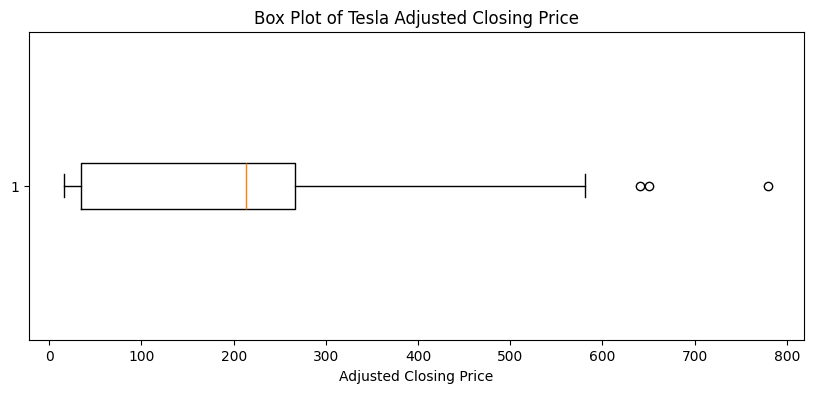

In [9]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['Adj Close'], vert=False)
plt.title("Box Plot of Tesla Adjusted Closing Price")
plt.xlabel("Adjusted Closing Price")
plt.show()

# Outcome:-
Most of Tesla’s adjusted closing prices are concentrated within a mid-range, as shown by the box (normal price behavior).

The long whiskers indicate periods of high volatility, where prices varied significantly.

The dots outside the whiskers represent outliers, showing unusually high prices caused by sharp market movements or exceptional events.

# STEP 3:- FEATURE SCALING
The Scaling is important because, Deep learning models learn by updating weights using gradient descent.
If input features have very large or uneven values, the learning process becomes unstable and inefficient.

In [10]:
# Step 1:- Importing the Required Library
from sklearn.preprocessing import MinMaxScaler

# Step 2:- Selecting the Target Column
close_prices = df[['Adj Close']]


# Step 3:- Splitting the dataset for Training and Testing
train_size = int(len(close_prices) * 0.8) # (Training Dataset = 80% and Testing Dataset = 20%)

train_data = close_prices[:train_size]
test_data = close_prices[train_size:]


# Step 4:- Fit Scaler for only Training Dataset
# Because if we scale the Testing Dataset, it may lead to incorrect prediction
# We apply fit_transform to the Trainig Dataset to enable the model to learn the parameters (Min and Max Value) from the Training Dataset
# We apply transform to the Testing Dataset to enable the model to apply the parameters (Min and Max Value) to the prediction
scaler = MinMaxScaler(feature_range=(0, 1))

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)



# Step 5:- Verify Scaling
train_scaled.min(), train_scaled.max()

(0.0, 0.9999999999999999)

# Report:-
Scaling is important in deep learning because it stabilizes gradient descent, speeds up convergence, and improves the performance of RNN and LSTM models on time-series data. Minor floating-point precision effects may cause the maximum scaled value to appear slightly less than 1, which does not affect model performance.

# STEP 4:- FEATURE ENGINEERING
Sequence Creation is required because, RNN and LSTM models do not understand time automatically.
We must convert the time-series data into input–output sequences so the model can learn from past values to predict future values.

In [11]:
# Step 1:- Importing the Required Library
import numpy as np

# The dataset (TSLA.csv) has date-time as index.
# If we feed this dataset to the models, it will not work because deep learning models donot understand time-series data
# This is why we perform sequence creation

# Step 2:- Define a Sequence Creation Function
def create_sequences(data, window_size, forecast_horizon=1): # Create a function with parameters (data, window_size(past_days),
    # Forecasr_horizon(Future days))
    
    X, y = [], [] # Define empty lists for input and output
    
    for i in range(len(data) - window_size - forecast_horizon + 1): # This loop slides the window across the dataset
        X.append(data[i:i + window_size]) # Appending the past values to the input list
        # if i = 0 and window_size = 60, then X(input) is day 0 to day 60
        y.append(data[i + window_size:i + window_size + forecast_horizon]) # Appending the future values to the output list
        # if i = 0 and window_size = 60, and forecast_horizon = 2, then y(ouput) is day 60 to day 61
        
    return np.array(X), np.array(y) # This will convert the input and output lists into arrays
    

WINDOW_SIZE = 60 # Defining the number of the past days

# Create Sequences for 1-Day Prediction
X_train_1d, y_train_1d = create_sequences(train_scaled, WINDOW_SIZE, forecast_horizon=1)
X_test_1d, y_test_1d = create_sequences(test_scaled, WINDOW_SIZE, forecast_horizon=1)

print(X_train_1d.shape, y_train_1d.shape) # Verifying the training and tetsing dataset for 1-day prediction


# Create Sequences for 5-Day Prediction
X_train_5d, y_train_5d = create_sequences(train_scaled, WINDOW_SIZE, forecast_horizon=5)
X_test_5d, y_test_5d = create_sequences(test_scaled, WINDOW_SIZE, forecast_horizon=5)

print(X_train_5d.shape, y_train_5d.shape) # Verifying the training and tetsing dataset for 5-day prediction


# Create Sequences for 10-Day Prediction
X_train_10d, y_train_10d = create_sequences(train_scaled, WINDOW_SIZE, forecast_horizon=10)
X_test_10d, y_test_10d = create_sequences(test_scaled, WINDOW_SIZE, forecast_horizon=10)

print(X_train_10d.shape, y_train_10d.shape) # Verifying the training and tetsing dataset for 10-day prediction

(1872, 60, 1) (1872, 1, 1)
(1868, 60, 1) (1868, 5, 1)
(1863, 60, 1) (1863, 10, 1)


# Report:-

# 1-Day Prediction:

Input shape: (1872, 60, 1)

Output shape: (1872, 1, 1)

Interpretation: 1,872 samples were created, where each input contains stock prices of the past 60 days to predict the next 1 day closing price.

# 5-Day Prediction:

Input shape: (1868, 60, 1)

Output shape: (1868, 5, 1)

Interpretation: Each input sequence of 60 days is used to predict the next 5 days of closing prices.

# 10-Day Prediction:

Input shape: (1863, 60, 1)

Output shape: (1863, 10, 1)

Interpretation: The model learns from 60 past days to forecast the next 10 days of stock prices.

In [12]:
import numpy as np

# We will save all the training and testing datasets for 1-day, 5-days and 10-days predictions
# We will save the datasets in the data folder

np.savez(
    "../data/tesla_sequences.npz",
    
    X_train_1d=X_train_1d,
    y_train_1d=y_train_1d,
    X_test_1d=X_test_1d,
    y_test_1d=y_test_1d,

    X_train_5d=X_train_5d,
    y_train_5d=y_train_5d,
    X_test_5d=X_test_5d,
    y_test_5d=y_test_5d,

    X_train_10d=X_train_10d,
    y_train_10d=y_train_10d,
    X_test_10d=X_test_10d,
    y_test_10d=y_test_10d
)

print("Successfully Saved the Datasets")

Successfully Saved the Datasets
